## Data Description

### Key Data Features 
`Date` : Daily records from [start_date] to [end_date].
    
`Store ID & Product ID`: Unique identifiers for stores and products.

`Category`: Product categories like Electronics, Clothing, Groceries, etc.

`Region`: Geographic region of the store.

`Inventory Level`: Stock available at the beginning of the day.
    
`Units Sold`: Units sold during the day.
    
`Demand Forecast`: Predicted demand based on past trends.

`Weather Condition`: Daily weather impacting sales.
    
`Holiday/Promotion`: Indicators for holidays or promotions.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df = pd.read_csv('D:/DEPI/retail_store_inventory/retail_store_inventory.csv')

In [69]:
df.head(10)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,1/1/2022,S001,P0001,Groceries,North,231,127,55.0,135.47,33.50,20,Rainy,0.0,29.69,Autumn
1,1/1/2022,S001,P0002,Toys,South,204,150,66.0,144.04,63.01,20,Sunny,0.0,66.16,Autumn
2,1/1/2022,S001,P0003,Toys,West,102,65,51.0,74.02,27.99,10,NaN,1.0,31.32,Summer
3,1/1/2022,S001,P0004,Toys,North,469,61,NaN,62.18,32.72,10,Cloudy,1.0,34.74,Autumn
4,1/1/2022,S001,P0005,Electronics,East,166,14,135.0,9.26,73.64,0,Sunny,0.0,68.95,Summer
5,1/1/2022,S001,P0006,Groceries,South,138,128,102.0,139.82,76.83,10,Sunny,1.0,79.35,Winter
6,1/1/2022,S001,P0007,Furniture,East,359,97,167.0,108.92,34.16,10,Rainy,1.0,36.55,Winter
7,1/1/2022,S001,P0008,Clothing,North,380,312,54.0,329.73,97.99,5,NaN,0.0,100.09,Spring
8,1/1/2022,S001,P0009,Electronics,West,183,175,135.0,174.15,20.74,10,Cloudy,0.0,17.66,Autumn
9,1/1/2022,S001,P0010,Toys,South,108,28,196.0,24.47,59.99,0,Rainy,1.0,61.21,Winter


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73079 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73069 non-null  float64
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73073 non-null  object 
 12  Holiday/Promotion   73094 non-null  float64
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73093 non-null  object 
dtypes: float64(5), int64(3), object(7)
memory usage: 8.4+

In [73]:
df.isnull().sum()

Date                   0
Store ID               0
Product ID             0
Category               0
Region                21
Inventory Level        0
Units Sold             0
Units Ordered         31
Demand Forecast        0
Price                  0
Discount               0
Weather Condition     27
Holiday/Promotion      6
Competitor Pricing     0
Seasonality            7
dtype: int64

In [75]:
df.dtypes

Date                   object
Store ID               object
Product ID             object
Category               object
Region                 object
Inventory Level         int64
Units Sold              int64
Units Ordered         float64
Demand Forecast       float64
Price                 float64
Discount                int64
Weather Condition      object
Holiday/Promotion     float64
Competitor Pricing    float64
Seasonality            object
dtype: object

In [105]:
# Summary statistics
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,Date,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,2022-12-31 23:59:59.999999744,274.469877,136.464870,110.015568,141.494720,55.135108,10.009508,0.497237,55.146077
min,2022-01-01 00:00:00,50.000000,0.000000,6.060000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,2022-07-02 00:00:00,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,2023-01-01 00:00:00,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,2023-07-03 00:00:00,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,2024-01-01 00:00:00,500.000000,499.000000,463.120000,518.550000,100.000000,20.000000,1.000000,104.940000
std,NaN,129.949514,108.919406,52.332196,109.254076,26.021945,7.083746,0.499996,26.191408


In [77]:
df['Category'].unique()

array(['Groceries', 'Toys', 'Electronics', 'Furniture', 'Clothing'],
      dtype=object)

In [79]:
df['Region'].unique()

array(['North', 'South', 'West', 'East', nan], dtype=object)

In [81]:
df['Weather Condition'].unique()

array(['Rainy', 'Sunny', nan, 'Cloudy', 'Snowy'], dtype=object)

In [83]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)

Date                  datetime64[ns]
Store ID                      object
Product ID                    object
Category                      object
Region                        object
Inventory Level                int64
Units Sold                     int64
Units Ordered                float64
Demand Forecast              float64
Price                        float64
Discount                       int64
Weather Condition             object
Holiday/Promotion            float64
Competitor Pricing           float64
Seasonality                   object
dtype: object


In [85]:
df['Region'] = df['Region'].fillna(df['Region'].mode()[0])
df['Weather Condition'] = df['Weather Condition'].fillna(df['Weather Condition'].mode()[0])
df['Holiday/Promotion'] = df['Holiday/Promotion'].fillna(df['Holiday/Promotion'].mode()[0])
df['Seasonality'] = df['Seasonality'].fillna(df['Seasonality'].mode()[0])
df['Units Ordered'] = df['Units Ordered'].fillna(df['Demand Forecast'])
df['Units Ordered'] = df['Units Ordered'].fillna(df.groupby('Category')['Units Ordered'].transform('mean'))
df['Units Ordered'] = df['Units Ordered'].fillna(0)

In [87]:
df.isnull().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [89]:
df.head(10)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55.00,135.47,33.50,20,Rainy,0.0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66.00,144.04,63.01,20,Sunny,0.0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51.00,74.02,27.99,10,Sunny,1.0,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,62.18,62.18,32.72,10,Cloudy,1.0,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135.00,9.26,73.64,0,Sunny,0.0,68.95,Summer
5,2022-01-01,S001,P0006,Groceries,South,138,128,102.00,139.82,76.83,10,Sunny,1.0,79.35,Winter
6,2022-01-01,S001,P0007,Furniture,East,359,97,167.00,108.92,34.16,10,Rainy,1.0,36.55,Winter
7,2022-01-01,S001,P0008,Clothing,North,380,312,54.00,329.73,97.99,5,Sunny,0.0,100.09,Spring
8,2022-01-01,S001,P0009,Electronics,West,183,175,135.00,174.15,20.74,10,Cloudy,0.0,17.66,Autumn
9,2022-01-01,S001,P0010,Toys,South,108,28,196.00,24.47,59.99,0,Rainy,1.0,61.21,Winter


In [91]:
df['Month'] = df['Date'].dt.month
df['Month'] = df['Date'].dt.to_period('M')
df.groupby('Month')['Units Sold'].count()

Month
2022-01    3100
2022-02    2800
2022-03    3100
2022-04    3000
2022-05    3100
2022-06    3000
2022-07    3100
2022-08    3100
2022-09    3000
2022-10    3100
2022-11    3000
2022-12    3100
2023-01    3100
2023-02    2800
2023-03    3100
2023-04    3000
2023-05    3100
2023-06    3000
2023-07    3100
2023-08    3100
2023-09    3000
2023-10    3100
2023-11    3000
2023-12    3100
2024-01     100
Freq: M, Name: Units Sold, dtype: int64

In [93]:
df['Units Sold'].describe()

count    73100.000000
mean       136.464870
std        108.919406
min          0.000000
25%         49.000000
50%        107.000000
75%        203.000000
max        499.000000
Name: Units Sold, dtype: float64

In [95]:
zero_sales = df[df['Units Sold'] == 0]
print(zero_sales['Month'].value_counts().sort_index())

Month
2022-01    12
2022-02    10
2022-03    14
2022-04    12
2022-05    15
2022-06    15
2022-07    21
2022-08    12
2022-09    16
2022-10    14
2022-11    10
2022-12    17
2023-01    15
2023-02    17
2023-03    21
2023-04    14
2023-05    14
2023-06    26
2023-07    18
2023-08    19
2023-09    15
2023-10     6
2023-11    12
2023-12    15
Freq: M, Name: count, dtype: int64


In [97]:
print(zero_sales['Product ID'].value_counts().head(10))

Product ID
P0019    25
P0004    24
P0018    24
P0015    24
P0010    24
P0020    20
P0007    20
P0014    20
P0017    19
P0001    18
Name: count, dtype: int64


In [99]:
print(zero_sales['Weather Condition'].value_counts())
print(zero_sales['Holiday/Promotion'].value_counts())

Weather Condition
Sunny     102
Snowy      94
Cloudy     85
Rainy      79
Name: count, dtype: int64
Holiday/Promotion
0.0    202
1.0    158
Name: count, dtype: int64


In [111]:
if 'date' in df.columns:
    df['day_of_week'] = df['date'].dt.dayofweek
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year

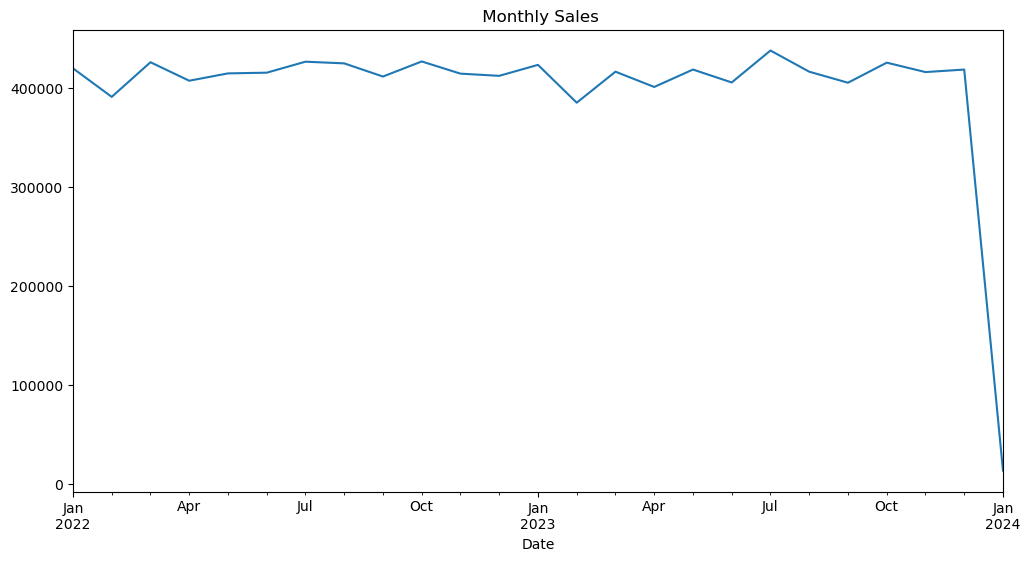

In [186]:
df_monthly = df.groupby(df['Date'].dt.to_period("M")).sum(numeric_only=True)
df_monthly['Units Sold'].plot(kind='line', figsize=(12,6), title=" Monthly Sales")
plt.show()

In [146]:
df.to_csv('D:/DEPI/retail_store_inventory/CleanedDataSet', index=False)
print("Cleaned dataset saved as 'CleanedDataSet.csv'")

Cleaned dataset saved as 'CleanedDataSet.csv'


In [150]:
df_balanced=pd.read_csv('D:/DEPI/retail_store_inventory/CleanedDataSet.csv')

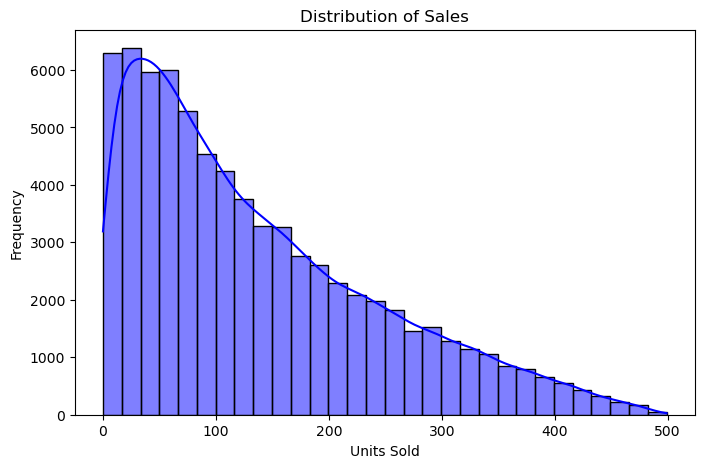

In [156]:
Distribution of Sales
plt.figure(figsize=(8, 5))
sns.histplot(df_balanced['Units Sold'], bins=30, kde=True, color='blue')
plt.xlabel("Units Sold")
plt.ylabel("Frequency")
plt.title("Distribution of Sales")
plt.show()

C:\Users\Mariam\AppData\Local\Temp\ipykernel_20396\3031228088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette="viridis")


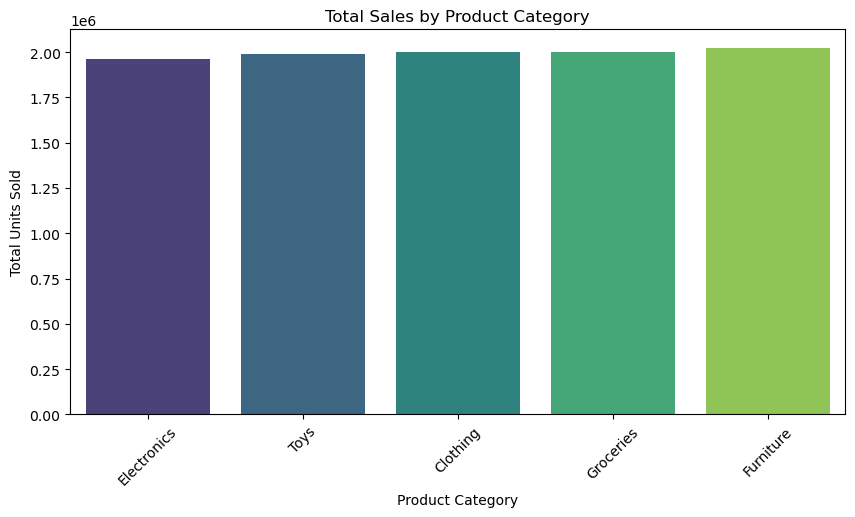

In [168]:
# Sales by Category
plt.figure(figsize=(10, 5))
category_sales = df.groupby("Category")["Units Sold"].sum().sort_values()
sns.barplot(x=category_sales.index, y=category_sales.values, palette="viridis")
plt.xlabel("Product Category")
plt.ylabel("Total Units Sold")
plt.title("Total Sales by Product Category")
plt.xticks(rotation=45)
plt.show()

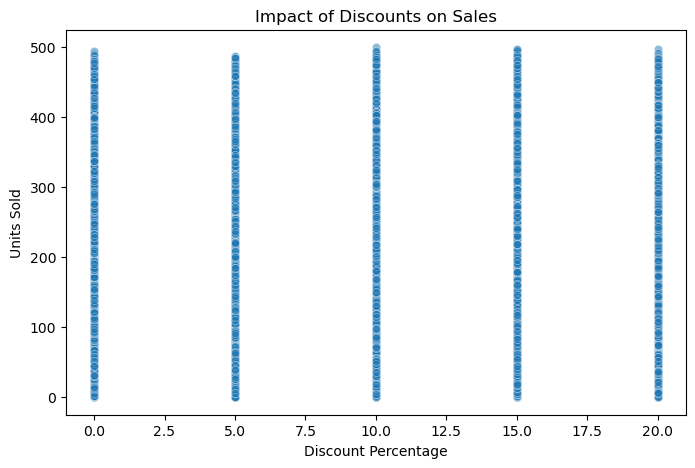

In [172]:
# Effect of Discounts on Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_balanced["Discount"], y=df_balanced["Units Sold"], alpha=0.5)
plt.xlabel("Discount Percentage")
plt.ylabel("Units Sold")
plt.title("Impact of Discounts on Sales")
plt.show()

C:\Users\Mariam\AppData\Local\Temp\ipykernel_20396\1088253674.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_balanced["Seasonality"], y=df_balanced["Units Sold"], palette="Set2")


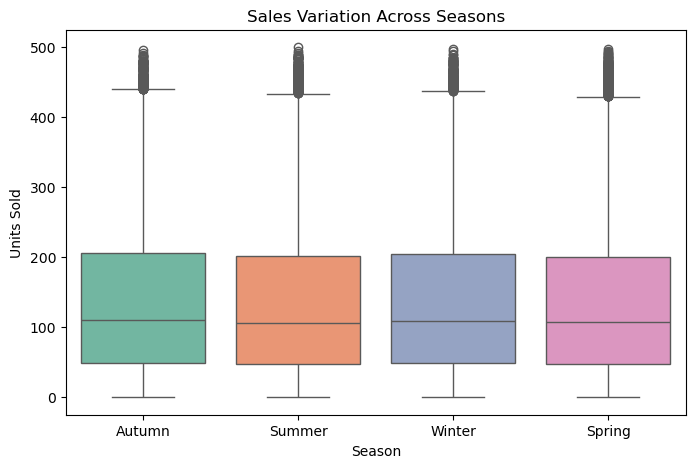

In [174]:
# Seasonality Analysis
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_balanced["Seasonality"], y=df_balanced["Units Sold"], palette="Set2")
plt.xlabel("Season")
plt.ylabel("Units Sold")
plt.title("Sales Variation Across Seasons")
plt.show()

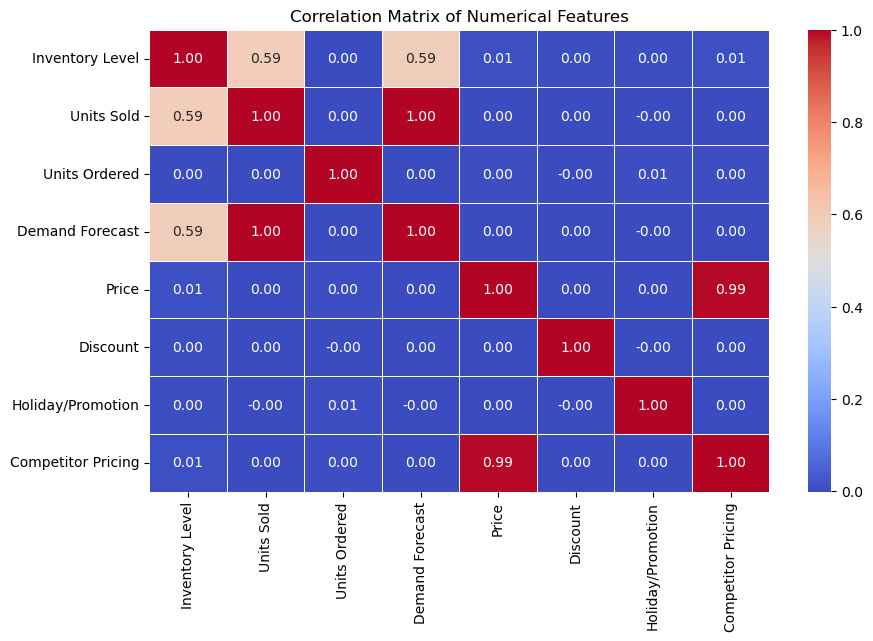

In [180]:
# Select only numerical columns for correlation analysis
numeric_df = df_balanced.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

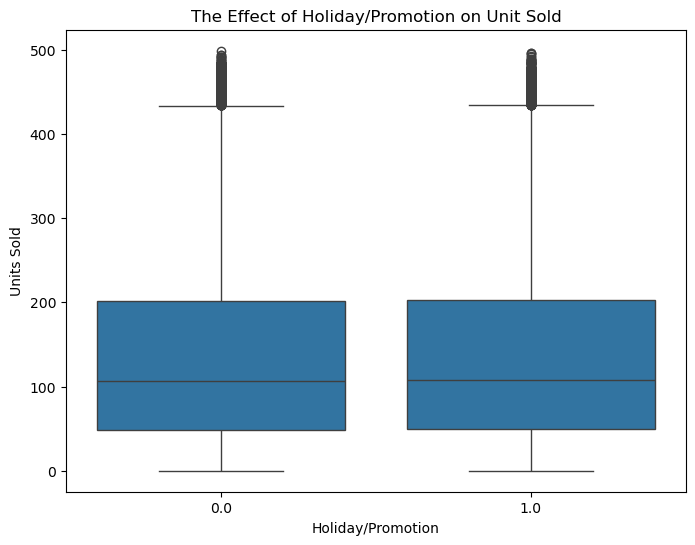

In [188]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df["Holiday/Promotion"], y=df["Units Sold"])
plt.title("The Effect of Holiday/Promotion on Unit Sold")
plt.show()

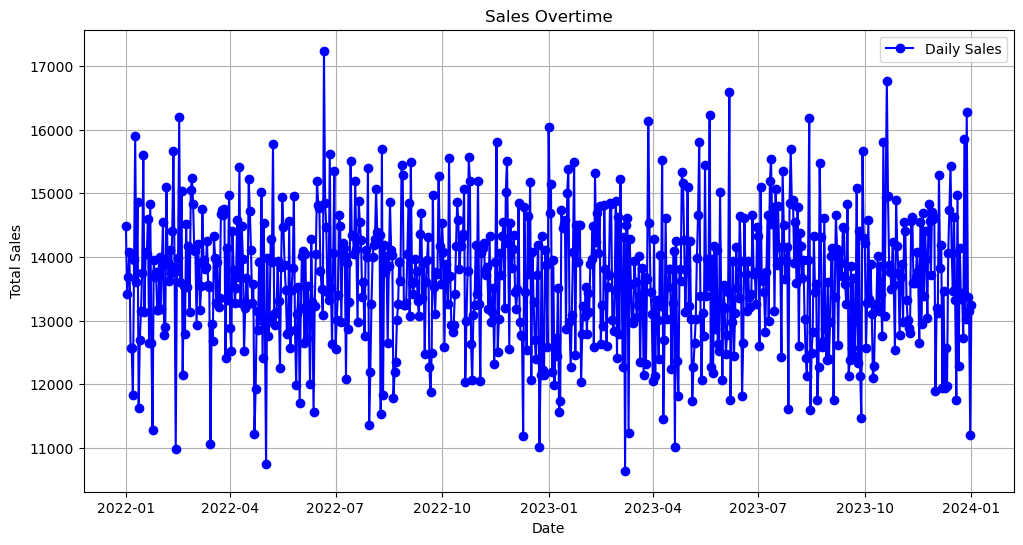

In [192]:
sales_trend = df.groupby('Date')['Units Sold'].sum()
plt.figure(figsize=(12, 6))
plt.plot(sales_trend.index, sales_trend.values, marker='o', linestyle='-', color='b', label="Daily Sales")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Sales Overtime")
plt.legend()
plt.grid(True)
plt.show()